# Assignment 1 - COMP255 - SDLC for Human Activity 


In [10]:
#Necessary imports
import numpy as np 
import pandas as pd 
from scipy import signal
import matplotlib.pyplot as plt 
import math
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [16]:
######DELETE LATER
df = pd.read_csv('dataset_1.txt', sep=',', header=None)  # use pandas to read csv file
print('The dataset contains %d rows.' % len(df)) 
df.head() # show first 5 rows of the dataset

The dataset contains 245576 rows.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.092478,0.14400,-0.009739,231.24,42.410,181.19,-0.13840,-0.85828,0.101680,32.813,...,-6.607700,-15.092,38.214,-0.90671,-0.43698,-0.52616,-91.394,33.158,4.2875,1
1,0.057310,0.16003,-0.009739,238.56,51.564,174.59,-0.15410,-0.86636,0.069517,46.727,...,-5.143100,-18.021,37.482,-0.94272,-0.32132,-0.49881,-82.606,36.087,-1.5711,1
2,0.022143,0.18408,-0.038329,243.69,59.620,166.17,-0.15410,-0.89867,0.053434,57.346,...,-3.678400,-20.584,37.116,-0.92271,-0.21722,-0.46756,-75.283,37.552,-5.9651,1
3,-0.001302,0.20412,-0.030160,246.62,65.112,156.29,-0.16981,-0.90675,0.049414,65.768,...,-0.749080,-23.514,35.285,-0.89070,-0.13626,-0.45193,-69.424,37.552,-8.8945,1
4,-0.032562,0.20813,-0.026076,250.64,70.605,145.30,-0.16981,-0.90675,0.081579,69.063,...,-0.016749,-24.246,33.088,-0.89870,-0.10927,-0.48709,-63.566,39.017,-10.3590,1


In [15]:
#Reading the data files

df1 = pd.read_csv('dataset_1.txt', sep=',', header=None)  # use pandas to read csv file
df2 = pd.read_csv('dataset_2.txt', sep=',', header=None)  # use pandas to read csv file
df3 = pd.read_csv('dataset_3.txt', sep=',', header=None)  # use pandas to read csv file
df4 = pd.read_csv('dataset_4.txt', sep=',', header=None)  # use pandas to read csv file
df5 = pd.read_csv('dataset_5.txt', sep=',', header=None)  # use pandas to read csv file
df6 = pd.read_csv('dataset_6.txt', sep=',', header=None)  # use pandas to read csv file
df7 = pd.read_csv('dataset_7.txt', sep=',', header=None)  # use pandas to read csv file
df8 = pd.read_csv('dataset_8.txt', sep=',', header=None)  # use pandas to read csv file
df9 = pd.read_csv('dataset_9.txt', sep=',', header=None)  # use pandas to read csv file
df10 = pd.read_csv('dataset_10.txt', sep=',', header=None)  # use pandas to read csv file
df11 = pd.read_csv('dataset_11.txt', sep=',', header=None)  # use pandas to read csv file
df12 = pd.read_csv('dataset_12.txt', sep=',', header=None)  # use pandas to read csv file
df13 = pd.read_csv('dataset_13.txt', sep=',', header=None)  # use pandas to read csv file
df14 = pd.read_csv('dataset_14.txt', sep=',', header=None)  # use pandas to read csv file
df15 = pd.read_csv('dataset_15.txt', sep=',', header=None)  # use pandas to read csv file
df16 = pd.read_csv('dataset_16.txt', sep=',', header=None)  # use pandas to read csv file
df17 = pd.read_csv('dataset_17.txt', sep=',', header=None)  # use pandas to read csv file
df18 = pd.read_csv('dataset_18.txt', sep=',', header=None)  # use pandas to read csv file
df19 = pd.read_csv('dataset_19.txt', sep=',', header=None)  # use pandas to read csv file


#print('The dataset contains %d rows.' % len(df)) 
#df.head() # show first 5 rows of the dataset

df_row = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df19])

print('The dataset contains %d rows.' % len(df_row)) 
df_row.tail()

The dataset contains 4686842 rows.


,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
230623,-0.32562,0.79331,-1.1819,-252.10,256.62,280.42,-0.232640,0.078695,0.186110,269.36,...,31.840,-50.976,93.139,-0.050303,0.92783,-0.22923,21.38500,-28.3580,207.88,13
230624,-0.44285,0.70113,-1.2105,-282.86,263.57,286.27,-0.240490,0.220050,0.109720,270.09,...,26.713,-59.398,94.604,-0.022290,0.95868,-0.33081,8.20300,-13.7110,219.59,13
230625,-0.52491,0.64902,-1.2268,-298.60,268.70,295.43,-0.205150,0.381600,0.045393,253.25,...,23.052,-62.693,93.871,0.217820,0.79675,-0.11202,-0.58494,-4.9231,222.52,13
230626,-0.61478,0.60894,-1.1942,-299.70,272.73,307.15,-0.059862,0.490640,-0.022957,215.53,...,20.855,-59.764,91.308,0.137790,0.60398,-0.10420,-6.44360,6.7942,216.66,13
230627,-0.66558,0.58088,-1.1615,-287.25,276.76,319.60,0.069721,0.611800,-0.107390,154.38,...,17.925,-53.905,86.548,-1.146800,6.80350,0.40762,34.56700,14.1180,212.27,13


In [ ]:
###########################################################################
CUSTOM CODE FROM HERE ON
###########################################################################

In [28]:
def data_visulization():
    # read dataset file
    df = df_row
    df_sitting = df[df[24] == 1].values
    # In this example code, only accelerometer 1 data (column 1 to 3) is used
    plt.plot(df_sitting[:, 0:3])
    plt.show()

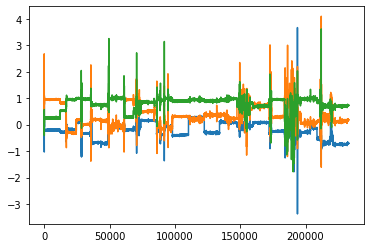

In [29]:
data_visulization()